## CARDIAC RISK DATASET EDA AND MACHINE LEARNING IMPEMENTATION

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print("bsgd")

In [7]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\J-NEW\WEEK 4\New major projects to work on\cardiac_risk.csv')
df.head()

,id,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0


In [8]:
df.shape

(70000, 15)

In [9]:
df.drop(['id','age in days'],axis=1,inplace=True)

In [10]:
df.shape

(70000, 13)

### COLUMN NAMES OF DATASET

In [11]:
df.columns

Index(['age', 'gender', 'height_in_cm', 'weight_in_kg', 'bp_hi', 'bp_lo',
       'avg_heart_rate', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
       'cardio'],
      dtype='object')

### Differentiating the variables into numerical and categorical variables

### Differentiating the (features) independent variables and the (Target) dependent variable.

### Specifying names of some variables to be used in the further Data Analysis.

In [12]:
MAX_HI_BP = 190
MIN_HI_BP = 60
MAX_LOW_BP = 120
MIN_LOW_BP = 30
MAX_AVG_HR = 300
MIN_AVG_HR = 30

### NULL VALUES

In [16]:
df.isnull().sum()

# we don't having any null values in the dataset so our dataset is clean on the part of null values, we can proceed for further analysis.

age               0
gender            0
height_in_cm      0
weight_in_kg      0
bp_hi             0
bp_lo             0
avg_heart_rate    0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [17]:
#Now make a copy of a dataframe for further analysis.
df_copy=df.copy()

In [18]:
df_copy.head()

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0


### Analysis from describe () method

In [20]:
df_copy.describe()

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,54.690500,1.349571,164.359229,74.205690,128.817286,96.630414,112.723850,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.935513,0.476838,8.210126,14.395757,154.011419,188.472530,122.653208,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,-35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1.000000,159.000000,65.000000,120.000000,80.000000,100.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,165.000000,72.000000,120.000000,80.000000,100.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,2.000000,170.000000,82.000000,140.000000,90.000000,110.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,8050.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### CHECK FOR BIASED DATA FOR THE DEPENDENT VARIABLE(CARDIO)

In [47]:
df_copy.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

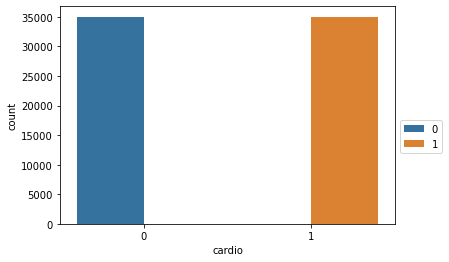

In [71]:
sns.countplot(df_copy.cardio,hue='cardio',saturation=0.7,data=df_copy)
plt.legend(loc=0,bbox_to_anchor=(1,0.5))
plt.show()

### CHECKING FOR THE OUTLIERS VISUALLY 

#### 1. Outliers in weight

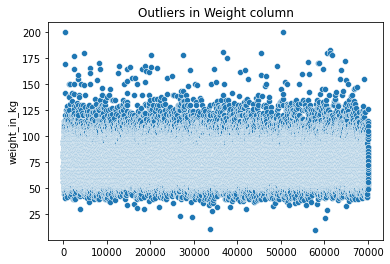

In [49]:
sns.scatterplot(df_copy.index,df_copy.weight_in_kg,data=df_copy)
plt.title('Outliers in Weight column')
plt.show()

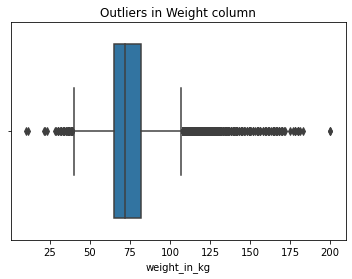

In [50]:
sns.boxplot(df_copy.weight_in_kg,data=df_copy)
plt.title('Outliers in Weight column')
plt.show()

#### 2. Outliers in Bp_hi

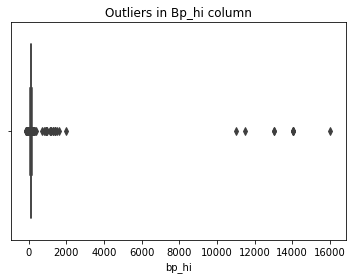

In [51]:
sns.boxplot(df_copy.bp_hi,data=df_copy)
plt.title('Outliers in Bp_hi column')
plt.show()

In [52]:
df_copy[(df_copy['bp_hi']<MIN_HI_BP) | (df_copy['bp_hi']>MAX_HI_BP)].count()

age               408
gender            408
height_in_cm      408
weight_in_kg      408
bp_hi             408
bp_lo             408
avg_heart_rate    408
cholesterol       408
gluc              408
smoke             408
alco              408
active            408
cardio            408
dtype: int64

#### 3. Outliers in Bp_lo

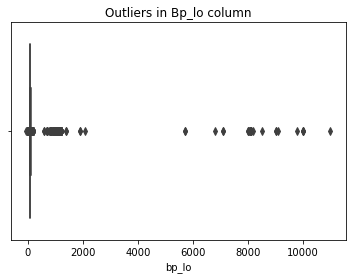

In [53]:
sns.boxplot(df_copy.bp_lo,data=df_copy)
plt.title('Outliers in Bp_lo column')
plt.show()

In [54]:
df_copy[(df_copy['bp_lo']<MIN_LOW_BP) | (df_copy['bp_lo']>MAX_LOW_BP)].count()

age               1109
gender            1109
height_in_cm      1109
weight_in_kg      1109
bp_hi             1109
bp_lo             1109
avg_heart_rate    1109
cholesterol       1109
gluc              1109
smoke             1109
alco              1109
active            1109
cardio            1109
dtype: int64

#### 4. Outliers in Avg_heart_rate

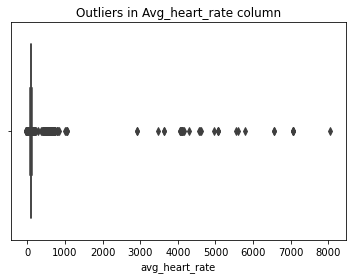

In [55]:
sns.boxplot(df_copy.avg_heart_rate,data=df_copy)
plt.title('Outliers in Avg_heart_rate column')
plt.show()

In [56]:
df_copy[(df_copy['avg_heart_rate']<MIN_AVG_HR) | (df_copy['avg_heart_rate']>MAX_AVG_HR)].count()

age               1003
gender            1003
height_in_cm      1003
weight_in_kg      1003
bp_hi             1003
bp_lo             1003
avg_heart_rate    1003
cholesterol       1003
gluc              1003
smoke             1003
alco              1003
active            1003
cardio            1003
dtype: int64

#### 5. Outliers in BMI(BODY MASS INDEX)

In [59]:
df_copy[(df_copy['weight_in_kg']/pow((df_copy['height_in_cm']/100),2) < 11) | (df_copy['weight_in_kg']/pow((df_copy['height_in_cm']/100),2) > 150)].count()

age               20
gender            20
height_in_cm      20
weight_in_kg      20
bp_hi             20
bp_lo             20
avg_heart_rate    20
cholesterol       20
gluc              20
smoke             20
alco              20
active            20
cardio            20
dtype: int64

### ANALYSIS FROM CORRELATION MATRIX

In [61]:
correlation=df_copy.corr()
correlation

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022793,-0.081302,0.053644,0.020624,0.017739,0.026578,0.154273,0.098768,-0.047525,-0.029377,-0.009896,0.238171
gender,-0.022793,1.000000,0.499033,0.155406,0.006005,0.015254,0.015490,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height_in_cm,-0.081302,0.499033,1.000000,0.290968,0.005488,0.006150,0.008171,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight_in_kg,0.053644,0.155406,0.290968,1.000000,0.030702,0.043710,0.052859,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
bp_hi,0.020624,0.006005,0.005488,0.030702,1.000000,0.016086,0.640192,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
bp_lo,0.017739,0.015254,0.006150,0.043710,0.016086,1.000000,0.778414,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
avg_heart_rate,0.026578,0.015490,0.008171,0.052859,0.640192,0.778414,1.000000,0.033383,0.015736,0.003406,0.009029,0.003652,0.084694
cholesterol,0.154273,-0.035821,-0.050226,0.141768,0.023778,0.024019,0.033383,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098768,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.015736,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047525,0.338135,0.187989,0.067780,-0.000922,0.005186,0.003406,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


<AxesSubplot:>

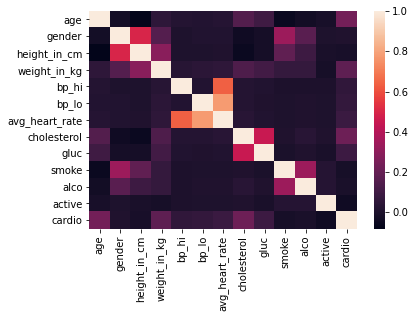

In [62]:
sns.heatmap(correlation)

## VISUAL INTERPRETATIONS

#### INTERPRETATIONS FROM HIGHLY CORRELATED VARIABLES.

##### 1. Correlation between Avg_heart_rate and Bp_hi

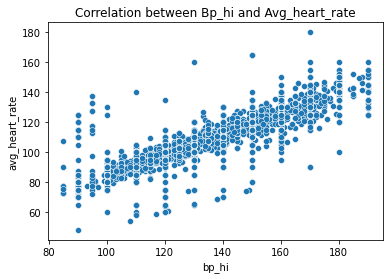

In [68]:
sns.scatterplot(x=df_copy[(df_copy['bp_hi']>80) & (df_copy['bp_hi']<=190)].bp_hi,y=df_copy[(df_copy['avg_heart_rate']>30) & (df_copy['avg_heart_rate']<=300)].avg_heart_rate,data=df_copy)
plt.title('Correlation between Bp_hi and Avg_heart_rate')
plt.show()

##### 2. Correlation between Avg_heart_rate and Bp_lo

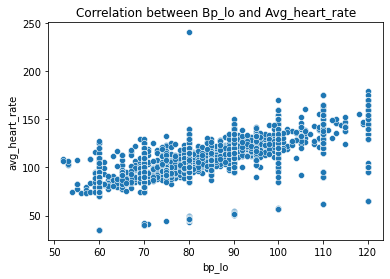

In [70]:
sns.scatterplot(x=df_copy[(df_copy['bp_lo']>50) & (df_copy['bp_lo']<=120)].bp_lo,y=df_copy[(df_copy['avg_heart_rate']>30) & (df_copy['avg_heart_rate']<=300)].avg_heart_rate,data=df_copy)
plt.title('Correlation between Bp_lo and Avg_heart_rate')
plt.show()

#### Conclusion from above visuals

#### INTERPRETATIONS FROM AFFECT OF INDEPENDENT VARIABLES ON DEPENDENT VARIABLES.

##### 1. Affect of Bp_hi on Cardio
##### When cardio is at category 1


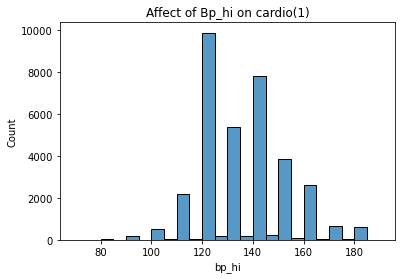

In [73]:
# affect of bp_hi on cardio
sns.histplot(x=df_copy[(df['cardio']==1) & (df_copy['bp_hi']<MAX_HI_BP) & (df_copy['bp_hi']>MIN_HI_BP)].bp_hi,data=df_copy,binwidth=5)
plt.title('Affect of Bp_hi on cardio(1)')
plt.show()

In [76]:
df_copy[(df_copy['cardio']==1) & (df_copy['bp_hi']<125) & (df_copy['bp_hi']>119)].bp_hi.count()/df_copy[(df_copy['bp_hi']<125) & (df_copy['bp_hi']>119)].bp_hi.count()

0.35569720541630656

In [77]:
df_copy[(df_copy['cardio']==1) & (df_copy['bp_hi']<145) & (df_copy['bp_hi']>139)].bp_hi.count()/df_copy[(df['bp_hi']<145) & (df_copy['bp_hi']>139)].bp_hi.count()

0.8166980539861896

##### When cardio is at category 0

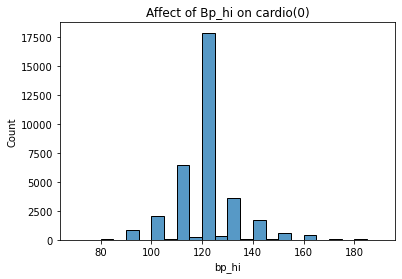

In [80]:
sns.histplot(x=df_copy[(df_copy['cardio']==0) & (df_copy['bp_hi']<MAX_HI_BP) & (df_copy['bp_hi']>MIN_HI_BP)].bp_hi,data=df_copy,binwidth=5)
plt.title('Affect of Bp_hi on cardio(0)')
plt.show()

In [83]:
df_copy[(df_copy['cardio']==0) & (df_copy['bp_hi']<125) & (df_copy['bp_hi']>119)].bp_hi.count()/df_copy[(df_copy['bp_hi']<125) & (df_copy['bp_hi']>119)].bp_hi.count()

0.6443027945836934

In [84]:
df_copy[(df_copy['cardio']==0) & (df_copy['bp_hi']<145) & (df_copy['bp_hi']>139)].bp_hi.count()/df_copy[(df_copy['bp_hi']<145) & (df_copy['bp_hi']>139)].bp_hi.count()

0.18330194601381042

##### 2. Affect of Bp_lo on Cardio
##### When cardio is at category 1


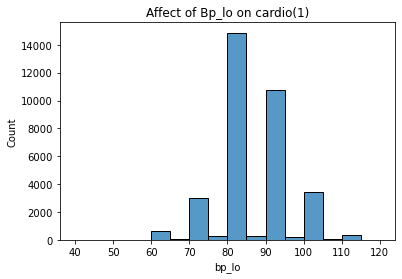

In [89]:
sns.histplot(x=df_copy[(df_copy['cardio']==1) & (df_copy['bp_lo']<MAX_LOW_BP) & (df_copy['bp_lo']>MIN_LOW_BP)].bp_lo,data=df_copy,binwidth=5)
plt.title('Affect of Bp_lo on cardio(1)')
plt.show()

In [86]:
df_copy[(df_copy['cardio']==1) & (df_copy['bp_lo']<85) & (df_copy['bp_lo']>79)].bp_lo.count()/df_copy[(df_copy['bp_lo']<85) & (df_copy['bp_lo']>79)].bp_lo.count()

0.4250207362068472

In [88]:
df_copy[(df['cardio']==1) & (df_copy['bp_lo']<95) & (df_copy['bp_lo']>89)].bp_lo.count()/df_copy[(df_copy['bp_lo']<95) & (df_copy['bp_lo']>89)].bp_lo.count()

0.7498262199360489

##### When cardio is at category 0

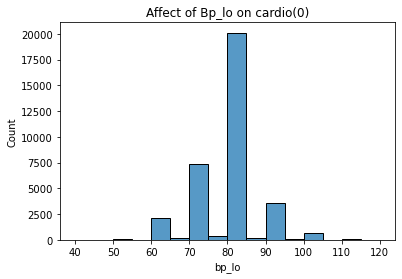

In [90]:
sns.histplot(x=df_copy[(df_copy['cardio']==0) & (df_copy['bp_lo']<MAX_LOW_BP) & (df_copy['bp_lo']>MIN_LOW_BP)].bp_lo,data=df_copy,binwidth=5)
plt.title('Affect of Bp_lo on cardio(0)')
plt.show()

In [91]:
df_copy[(df_copy['cardio']==0) & (df_copy['bp_lo']<85) & (df_copy['bp_lo']>79)].bp_lo.count()/df_copy[(df['bp_lo']<85) & (df_copy['bp_lo']>79)].bp_lo.count()

0.5749792637931528

In [92]:
df_copy[(df_copy['cardio']==0) & (df_copy['bp_lo']<95) & (df_copy['bp_lo']>89)].bp_lo.count()/df_copy[(df_copy['bp_lo']<95) & (df_copy['bp_lo']>89)].bp_lo.count()

0.2501737800639511

##### 3. Affect of Age on Cardio

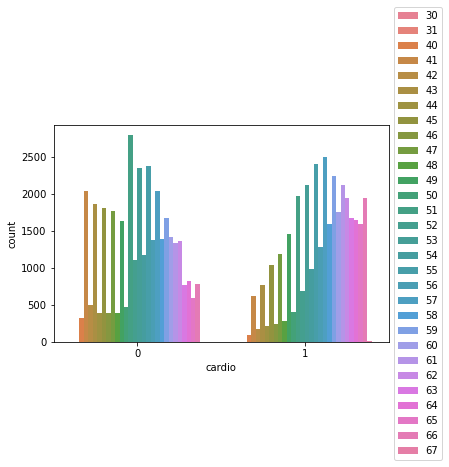

In [108]:
sns.countplot(x=df_copy.cardio,data=df_copy,hue='age',palette="husl")
plt.legend(loc=6,bbox_to_anchor=(1,0.5))

##### 4. Affect of Gender on Cardio

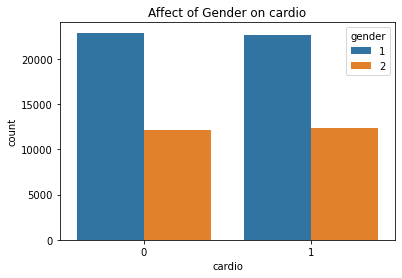

In [110]:
sns.countplot(df_copy.cardio,hue='gender',data=df_copy)
plt.title('Affect of Gender on cardio')
plt.show()

##### 5. Affect of Glucose level on Cardio

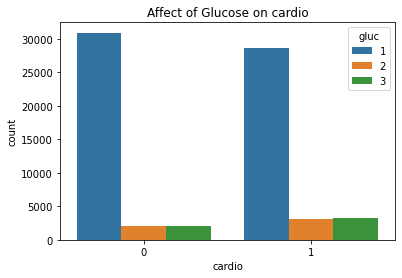

In [111]:
sns.countplot(df_copy.cardio,hue='gluc',data=df_copy)
plt.title('Affect of Glucose on cardio')
plt.show()
# gluc-1    59479
# gluc-3     5331
# gluc-2     5190

##### 6. Affect of Cholesterol level on Cardio

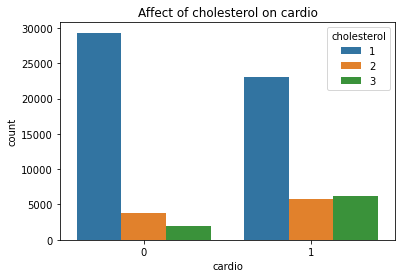

In [113]:
sns.countplot(df_copy.cardio,hue='cholesterol',data=df_copy)
plt.title('Affect of cholesterol on cardio')
plt.show()
# 1    52385
# 2     9549
# 3     8066

##### 7. Affect of Active on Cardio

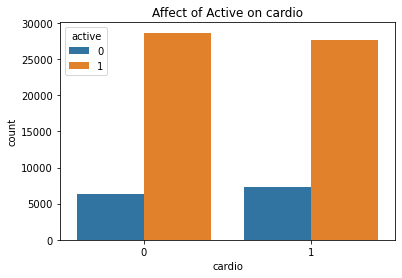

In [114]:
sns.countplot(df_copy.cardio,hue='active',data=df_copy)
plt.title('Affect of Active on cardio')
plt.show()
# 0    35021
# 1    34979

##### 8. Affect of Smoke on Cardio

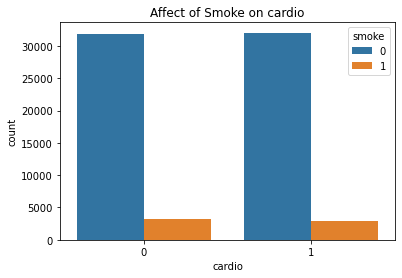

In [115]:
sns.countplot(df_copy.cardio,hue='smoke',data=df_copy)
plt.title('Affect of Smoke on cardio')
plt.show()
# 0    63831
# 1     6169

##### 9. Affect of Alcohol Consumption on Cardio

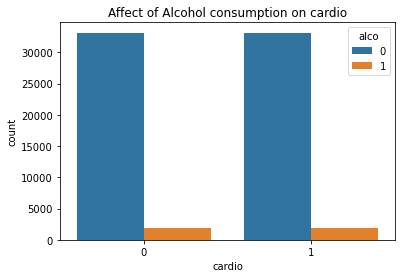

In [116]:
sns.countplot(df_copy.cardio,hue='alco',data=df_copy)
plt.title('Affect of Alcohol consumption on cardio')
plt.show()
# 0    66236
# 1     3764

##### 9. Affect of Avg_heart_rate on Cardio
#####  When cardio is at category 1


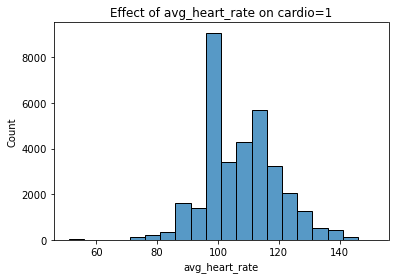

In [117]:
sns.histplot(x=df_copy[(df_copy['cardio']==1) & (df_copy['avg_heart_rate']<150) & (df_copy['avg_heart_rate']>50)].avg_heart_rate,data=df_copy,binwidth=5)
plt.title('Effect of avg_heart_rate on cardio=1')
plt.show()

In [118]:
df_copy[(df_copy['cardio']==1) & (df_copy['avg_heart_rate']>99) & (df_copy['avg_heart_rate']<105)].avg_heart_rate.count()/df_copy[ (df_copy['avg_heart_rate']>99) & (df_copy['avg_heart_rate']<105)].avg_heart_rate.count()

0.36323099992107966

In [119]:
df_copy[(df_copy['cardio']==1) & (df_copy['avg_heart_rate']>109) & (df_copy['avg_heart_rate']<115)].avg_heart_rate.count()/df_copy[ (df_copy['avg_heart_rate']>109) & (df_copy['avg_heart_rate']<115)].avg_heart_rate.count()

0.7076090521482453

#####  When cardio is at category 0

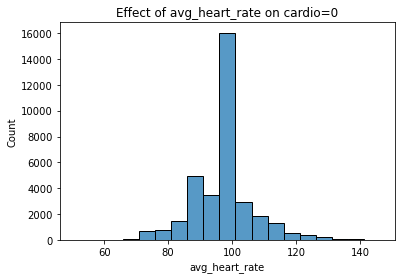

In [121]:
sns.histplot(x=df_copy[(df_copy['cardio']==0) & (df_copy['avg_heart_rate']<150) & (df_copy['avg_heart_rate']>50)].avg_heart_rate,data=df_copy,binwidth=5)
plt.title('Effect of avg_heart_rate on cardio=0')
plt.show()

In [124]:
df_copy[(df_copy['cardio']==0) & (df_copy['avg_heart_rate']>99) & (df_copy['avg_heart_rate']<105)].avg_heart_rate.count()/df_copy[ (df_copy['avg_heart_rate']>99) & (df_copy['avg_heart_rate']<105)].avg_heart_rate.count()

0.6367690000789203

In [125]:
df_copy[(df_copy['cardio']==0) & (df_copy['avg_heart_rate']>109) & (df_copy['avg_heart_rate']<115)].avg_heart_rate.count()/df_copy[ (df_copy['avg_heart_rate']>109) & (df_copy['avg_heart_rate']<115)].avg_heart_rate.count()

0.2923909478517547

#### INTERPRETATIONS FROM RELATION BETWEEN INDEPENDENT VARIABLES.

##### Relation between Avg heart rate and age

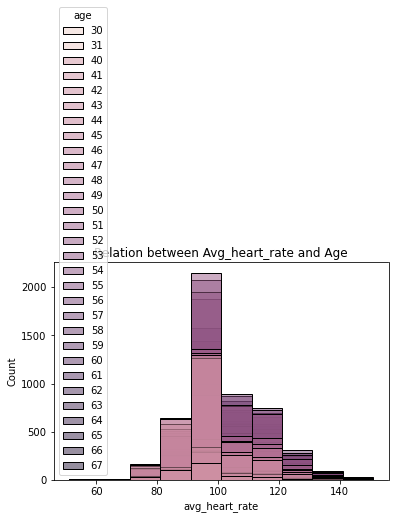

In [131]:
sns.histplot(x=df_copy[(df_copy['avg_heart_rate']>50) & (df_copy['avg_heart_rate']<=150)].avg_heart_rate,hue='age',binwidth=10,data=df_copy)
plt.title('Relation between Avg_heart_rate and Age')
plt.show()

### FILTERATION OF THE DATA FOR THE MODEL IMPLEMENTATION

#### BP LOW FILTERATION 

In [137]:
fatal_bplow=df_copy[(df_copy['bp_lo']<MIN_LOW_BP) | (df_copy['bp_lo']>MAX_LOW_BP)]
fatal_bplow.count()

age               1109
gender            1109
height_in_cm      1109
weight_in_kg      1109
bp_hi             1109
bp_lo             1109
avg_heart_rate    1109
cholesterol       1109
gluc              1109
smoke             1109
alco              1109
active            1109
cardio            1109
dtype: int64

In [138]:
df_copy.drop(fatal_bplow.index,axis=0,inplace=True)

In [139]:
df_copy.shape

(68891, 13)

#### BP HIGH FILTERATION 

In [140]:
fatal_bphigh=df_copy[(df_copy['bp_hi']<MIN_HI_BP) | (df_copy['bp_hi']>MAX_HI_BP)]
fatal_bphigh.count()

age               336
gender            336
height_in_cm      336
weight_in_kg      336
bp_hi             336
bp_lo             336
avg_heart_rate    336
cholesterol       336
gluc              336
smoke             336
alco              336
active            336
cardio            336
dtype: int64

In [141]:
df_copy.drop(fatal_bphigh.index,axis=0,inplace=True)

In [142]:
df_copy.shape

(68555, 13)

#### AVG HEART RATE FILTERATION 

In [143]:
df_copy[(df_copy['avg_heart_rate']<30) | (df_copy['avg_heart_rate']>300)].count()
#less than 30 and more than 300 should be removed.
#but by chance by the above removal of values this is automatically removed.

age               0
gender            0
height_in_cm      0
weight_in_kg      0
bp_hi             0
bp_lo             0
avg_heart_rate    0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

#### BMI FILTERATION 

In [147]:
fatal_bmi=df_copy[(df_copy['weight_in_kg']/pow((df_copy['height_in_cm']/100),2) < 11) | (df_copy['weight_in_kg']/pow((df_copy['height_in_cm']/100),2) > 150)]
fatal_bmi.count()

age               19
gender            19
height_in_cm      19
weight_in_kg      19
bp_hi             19
bp_lo             19
avg_heart_rate    19
cholesterol       19
gluc              19
smoke             19
alco              19
active            19
cardio            19
dtype: int64

In [148]:
df_copy.drop(fatal_bmi.index,axis=0,inplace=True)

In [149]:
df_copy.shape

(68536, 13)

In [150]:
df_copy.head()

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0


In [151]:
y=df_copy['cardio']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [152]:
x=df_copy.drop('cardio',axis=1)
x.head()

,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active
0,52,2,168,62.0,110,80,95.0,1,1,0,0,1
1,57,1,156,85.0,140,90,115.0,3,1,0,0,1
2,53,1,165,64.0,130,70,100.0,3,1,0,0,0
3,50,2,169,82.0,150,100,125.0,1,1,0,0,1
4,49,1,156,56.0,100,60,80.0,1,1,0,0,0


### MODEL SELECTION AND IMPLEMENTATION

# KNN

In [153]:
#splitting the training and testing variables to train the model.
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.3) 

In [154]:
#defining the neighbours of the testing value.
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [155]:
#Fitting the model 
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [156]:
#predicting the model
predict=knn.predict(test_x)
predict

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(predict,test_y)*100

69.06278877486504

#### KNN is providing accuracy of 69% which is not good.We can drop of this method for model implementation.

# LOGISTIC REGRESSION

In [158]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [160]:
model.fit(train_x,train_y)

LogisticRegression()

In [161]:
pred=model.predict(test_x)

In [162]:
accuracy_score(pred,test_y)

0.7130976119838529

#### Accuracy of logistic is 71.30% which is more than KNN and 70% accuracy is quite good..we can keep this for now and look for other better model

In [163]:
print(classification_report(pred,test_y))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     11302
           1       0.67      0.73      0.70      9259

    accuracy                           0.71     20561
   macro avg       0.71      0.71      0.71     20561
weighted avg       0.72      0.71      0.71     20561



In [164]:
confusion_matrix(pred,test_y)

array([[7907, 3395],
       [2504, 6755]], dtype=int64)

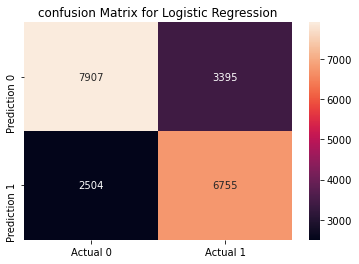

In [165]:
cm=confusion_matrix(pred,test_y)
conf_matrix=pd.DataFrame(cm,index=['Prediction 0','Prediction 1'],columns=['Actual 0','Actual 1'])

sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.title('confusion Matrix for Logistic Regression')
plt.show()
#14724 true values

#### This model is giving 14,724 true values and FN is low from FP. For better fitting and accuracy we should focus on reducing FN.

# Naive Bayes

In [166]:
#importing the model.
from sklearn.naive_bayes import GaussianNB
Bayes=GaussianNB()
Bayes

GaussianNB()

In [167]:
#fitting the data into the model
Bayes.fit(train_x,train_y)

GaussianNB()

In [168]:
pred1=Bayes.predict(test_x)

In [169]:
accuracy_score(pred1,test_y)

0.7181070959583677

#### Accuracy of Naive Bayes is 71.81% which is more than KNN and close enough to logistic.

In [170]:
Bayes.score(x,y)

0.7188338975137154

In [171]:
print(classification_report(pred1,test_y))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75     12363
           1       0.62      0.77      0.68      8198

    accuracy                           0.72     20561
   macro avg       0.72      0.73      0.71     20561
weighted avg       0.74      0.72      0.72     20561



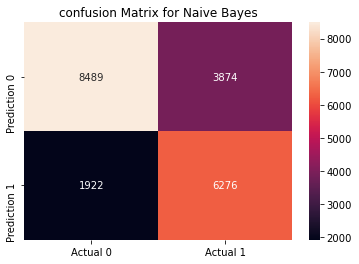

In [172]:
cm1=confusion_matrix(pred1,test_y)
conf_matrix1=pd.DataFrame(cm1,index=['Prediction 0','Prediction 1'],columns=['Actual 0','Actual 1'])

sns.heatmap(conf_matrix1,annot=True,fmt='d')
plt.title('confusion Matrix for Naive Bayes')
plt.show()
#14820 true values

#### This model is giving 14,765 true values and FN is also quite low from FP.
#### This model is giving us more true values as compare to the logistic regression and lesser number of FN values.


 # Decision Tree

In [173]:
#importing the model.
from sklearn import tree
model=tree.DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [174]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [175]:
pred2=model.predict(test_x)
pred2

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [176]:
accuracy_score(pred2,test_y)

0.6370312727980156

#### Accuracy of Decision tree(63%) is also quite low..we can drop this algorithm.

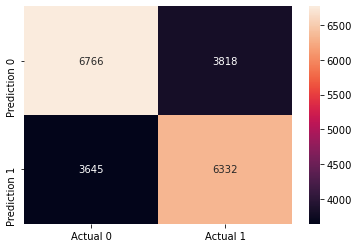

In [177]:
cm2=confusion_matrix(pred2,test_y)
conf_matrix2=pd.DataFrame(cm2,index=['Prediction 0','Prediction 1'],columns=['Actual 0','Actual 1'])

sns.heatmap(conf_matrix2,annot=True,fmt='d')
plt.show()

# Random  forest

In [178]:
#importing the module
from sklearn import ensemble
classifier=ensemble.RandomForestClassifier()
classifier

RandomForestClassifier()

In [179]:
classifier.fit(train_x,train_y)

RandomForestClassifier()

In [180]:
pred3=classifier.predict(test_x)

In [181]:
accuracy_score(pred3,test_y)

0.7011818491318516

#### Accuracy of Random Forest is close to Logistic and Naive Bayes,we are considering both of the algorithms and can take this one also in implementation.

In [182]:
print(classification_report(pred3,test_y))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71     10521
           1       0.69      0.70      0.70     10040

    accuracy                           0.70     20561
   macro avg       0.70      0.70      0.70     20561
weighted avg       0.70      0.70      0.70     20561



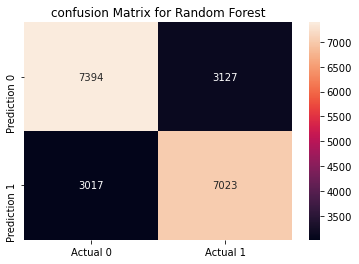

In [183]:
cm3=confusion_matrix(pred3,test_y)
conf_matrix3=pd.DataFrame(cm3,index=['Prediction 0','Prediction 1'],columns=['Actual 0','Actual 1'])

sns.heatmap(conf_matrix3,annot=True,fmt='d')
plt.title('confusion Matrix for Random Forest')
plt.show()

#### This model is giving 14,417 true values, although this model is giving a fair enough true values but the count of FN values is quite high which means model is falsely predicting .‘One actually are at risk’ and model is predicting that ‘they are not at risk’ which is dangerous.

### CONCLUSION

### Out of 3 better models namely Logistic Regression,Naive bayes and Random Forest
### Naïve Bayes is best one which is having 72% accuracy and the True values is also high and False Negative(1922) is quite low as compared to  other models.